In [15]:
## load the libraries 
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
import keras as ke
import tensorflow as tf
#from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import os, random

In [26]:


(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

## normalize and reshape the predictors  
train_x = train_x / 255

## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

# Define the labels dictionary
labels = {0: "T-shirt/top",
          1: "Trouser",
          2: "Pullover",
          3: "Dress",
          4: "Coat",
          5: "Sandal",
          6: "Shirt",
          7: "Sneaker",
          8: "Bag",
          9: "Ankle boot"}

In [28]:
# Load Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

# Normalize and reshape the predictors
train_x = train_x / 255
test_x = test_x / 255
train_x = train_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

# Create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

# Define the labels dictionary
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

Initializing Tensor

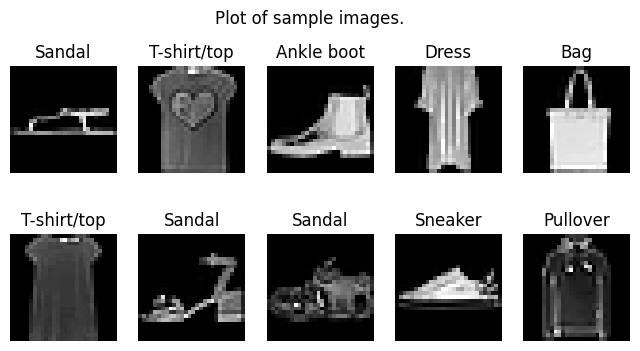

In [29]:
# Define the plot_sample function
def plot_sample():
    indexes = np.random.randint(0, len(train_x), size=10)
    fig, axes = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(8, 4))
    axes = axes.flatten()

    for i, index in enumerate(indexes):
        axes[i].imshow(train_x[index].reshape(28, 28), cmap="gray")  # Reshape the image data
        axes[i].set_title(f"{labels[train_y[index]]}")
        axes[i].axis("off")
    fig.suptitle("Plot of sample images.")
    plt.show()

# Call the plot_sample function
plot_sample()


In [30]:

import numpy as np

# Check the shapes of train_x and test_x
print("Shape of train_x:", train_x.shape)
print("Shape of test_x:", test_x.shape)

# Reshape test_x if necessary to match the shape of train_x
if len(train_x.shape) != len(test_x.shape):
    test_x = test_x.reshape((-1, 28 * 28))

# Concatenate train_x and test_x
train_data = np.concatenate((train_x, test_x))

# Check the shape of the concatenated array
print("Shape of concatenated array:", train_data.shape)

Shape of train_x: (48000, 784)
Shape of test_x: (10000, 784)
Shape of concatenated array: (58000, 784)


In [55]:
@tf.function
def sampling(inputs):
    mean, log_var = inputs
    eps = K.random_normal(shape=tf.shape(mean))
    z = mean + K.exp(0.5*log_var) * eps
    return z

NameError: name 'tf' is not defined

In [31]:
model = ke.Sequential()
model.add(ke.layers.Input(train_x.shape[1]))
model.add(ke.layers.Dropout(0.2))
model.add(ke.layers.BatchNormalization())
model.add(ke.layers.Dense(20, activation='relu'))
model.add(ke.layers.Dense(13, activation='relu'))
model.add(ke.layers.Dense(9, activation='relu'))
model.add(ke.layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_1 (Dropout)         (None, 784)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 20)                15700     
                                                                 
 dense_5 (Dense)             (None, 13)                273       
                                                                 
 dense_6 (Dense)             (None, 9)                 126       
                                                                 
 dense_7 (Dense)             (None, 7)                 70        
                                                      

In [32]:
opt = tf.optimizers.Adam(learning_rate=1e-4)

In [34]:
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [35]:
try:
    # Set the seed for reproducibility
    i = 543
    os.environ['PYTHONHASHSEED'] = str(i)
    tf.random.set_seed(i)
    np.random.seed(i)
    random.seed(i)

    # Assuming 'model' is already defined
    history = model.fit(
        x=train_x,
        y=train_y,
        epochs=275,
        batch_size=700,
        validation_data=(val_x, val_y)
    )

except tf.errors.InvalidArgumentError as e:
    print("InvalidArgumentError:", e)
    print("Invalid label values encountered. Please check label encoding and data preprocessing.")

Epoch 1/275
InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "c:\Users\Admin\Documents\MLAI\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Admin\Documents\MLAI\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\Admin\Documents\MLAI\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\Admin\Documents\MLAI\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File 